In [1]:
import cv2
import imutils
import numpy as np
import os
import pandas as pd

from tqdm import tqdm
from glob import glob
from albumentations import RandomCrop, HorizontalFlip, VerticalFlip

from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt


import os


In [78]:
def get_num_files(path: str) -> int:
    list = os.listdir(actual_path)
    return len(list)

TypeError: expected str, bytes or os.PathLike object, not NoneType

C:\Users\pedri\AppData\Local\Temp/ipykernel_26268/1923347325.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (23).

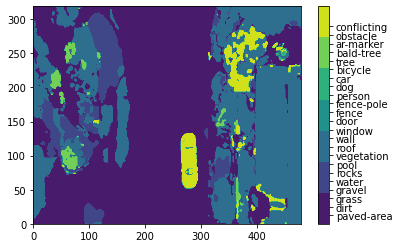

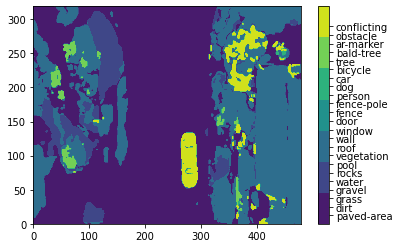

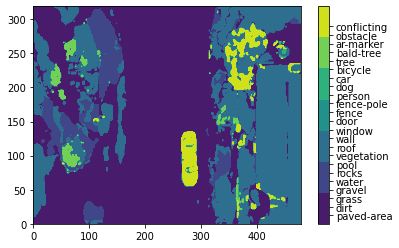

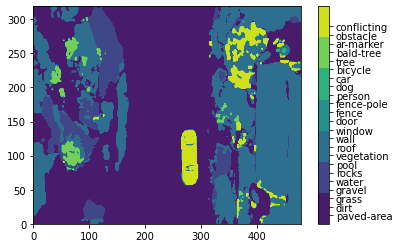

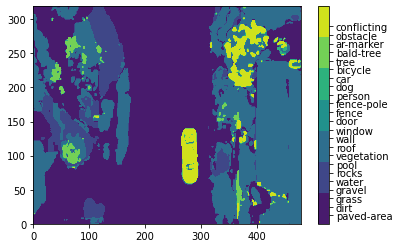

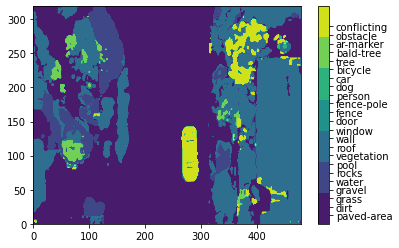

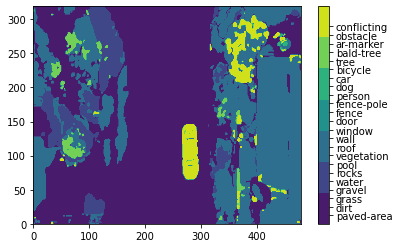

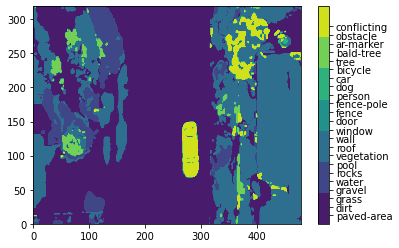

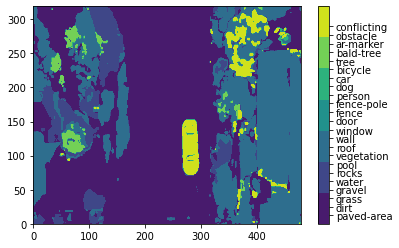

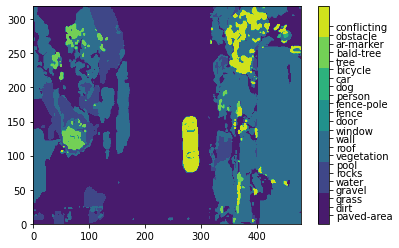

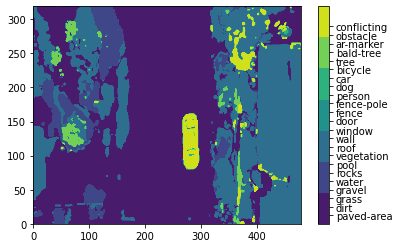

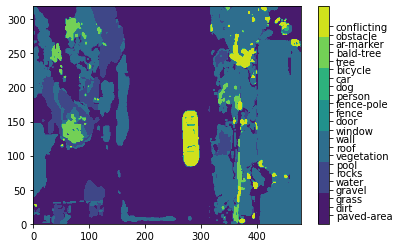

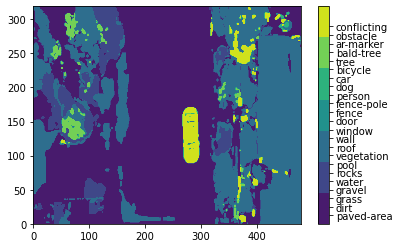

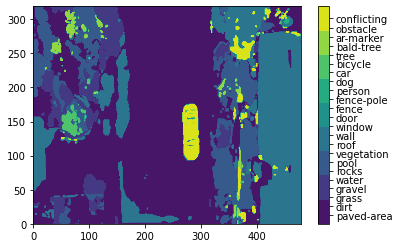

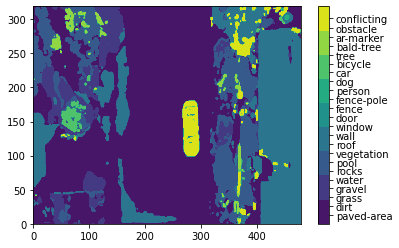

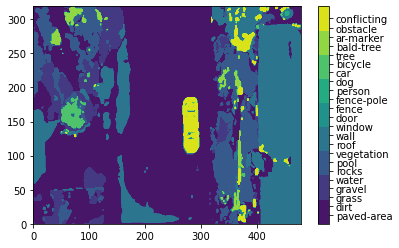

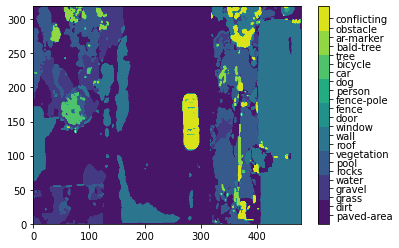

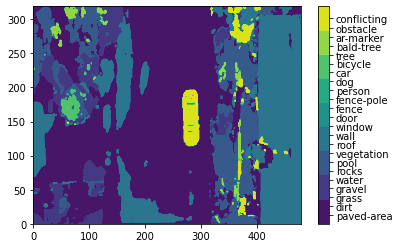

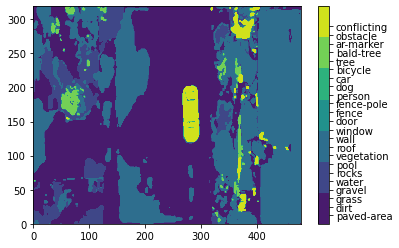

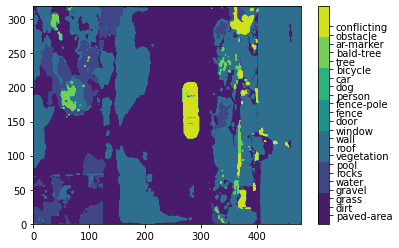

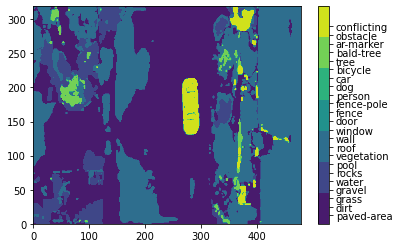

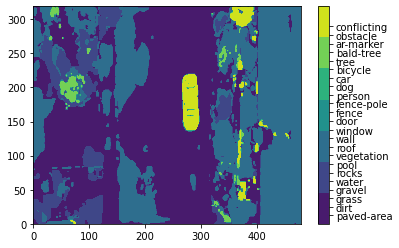

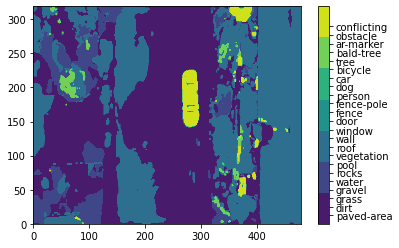

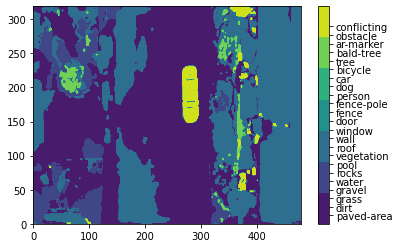

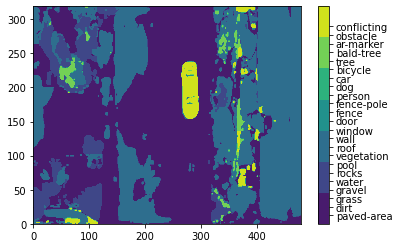

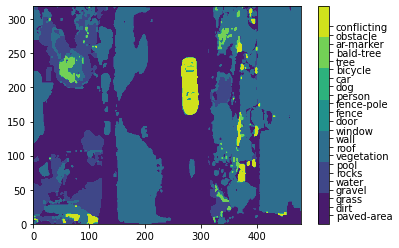

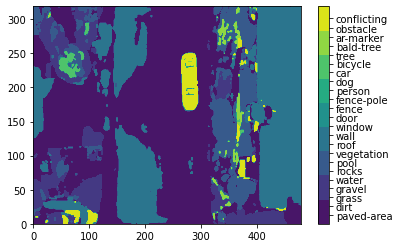

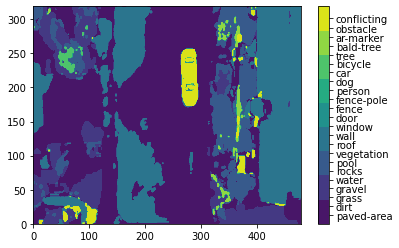

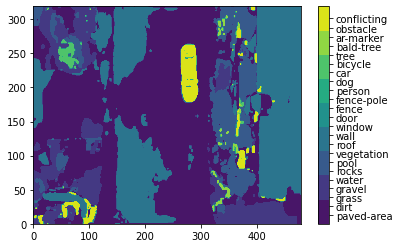

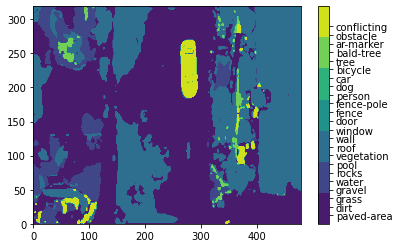

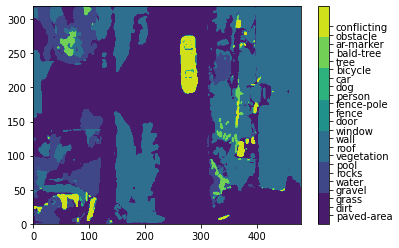

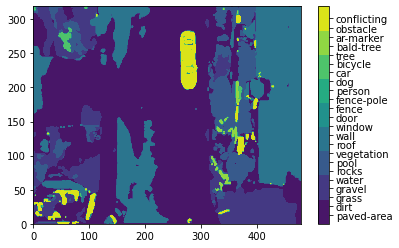

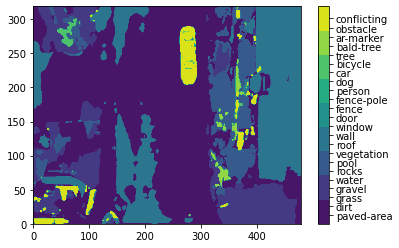

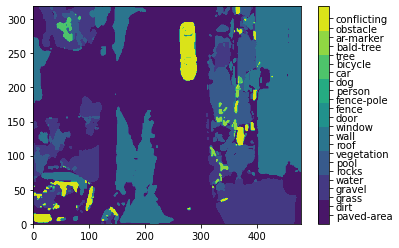

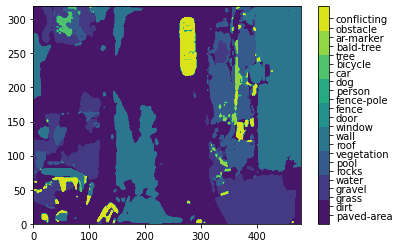

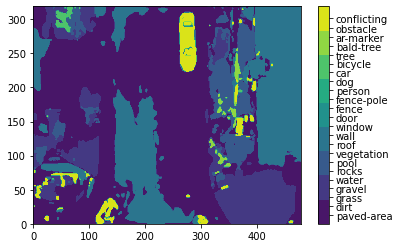

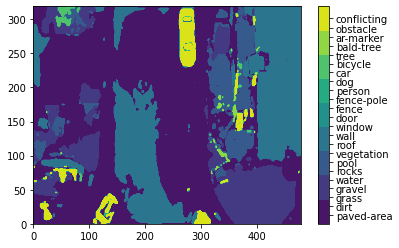

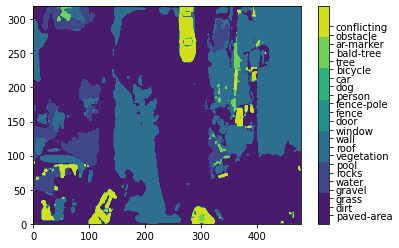

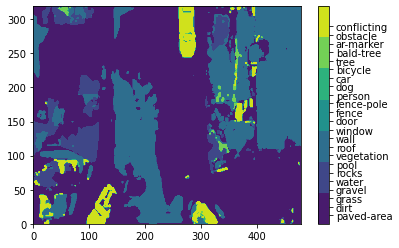

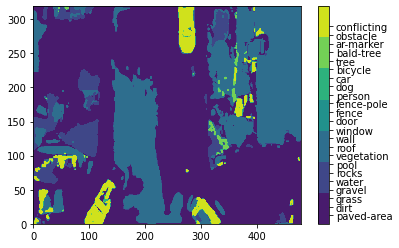

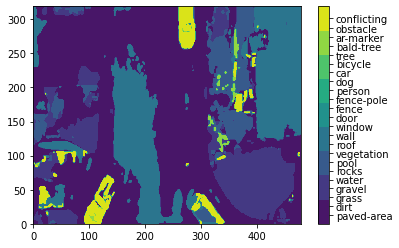

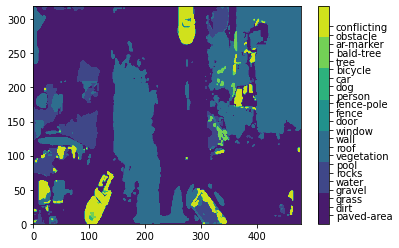

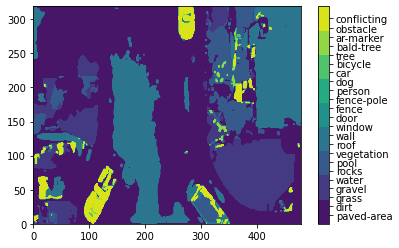

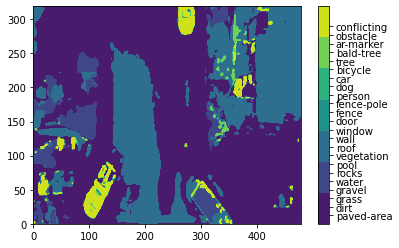

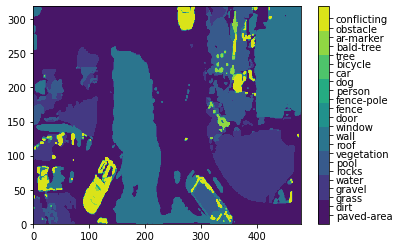

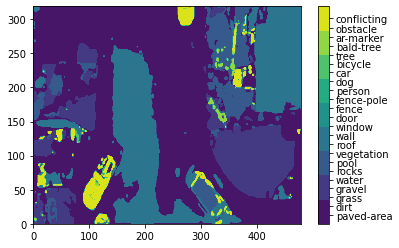

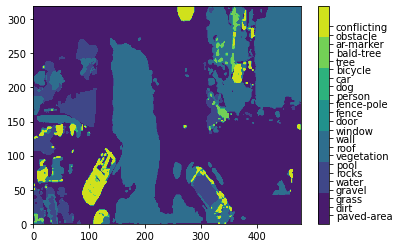

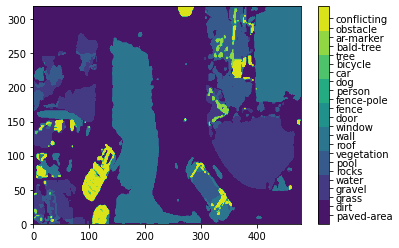

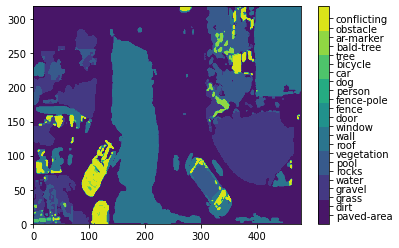

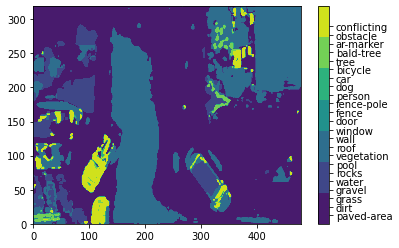

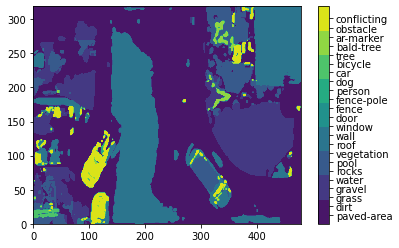

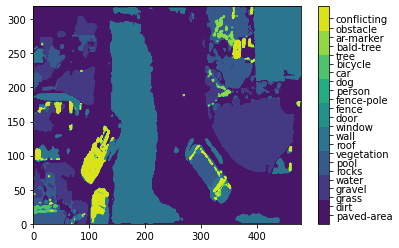

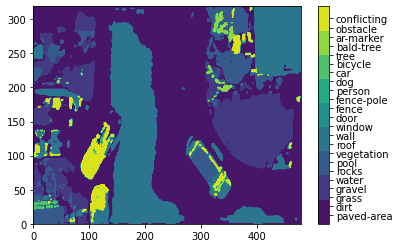

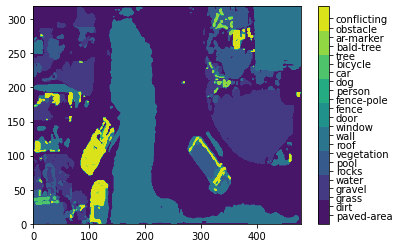

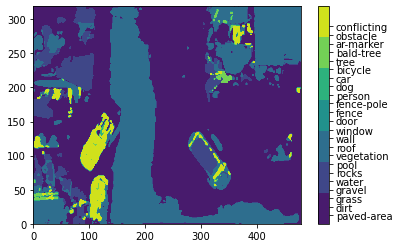

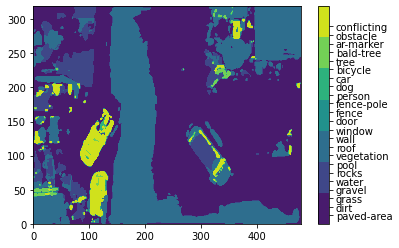

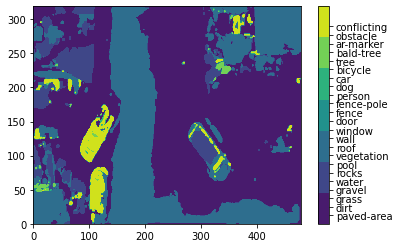

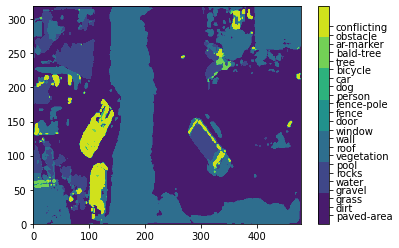

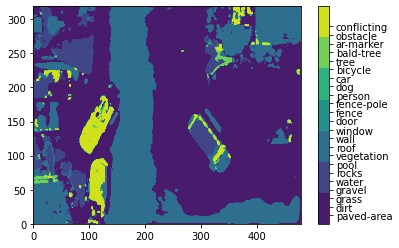

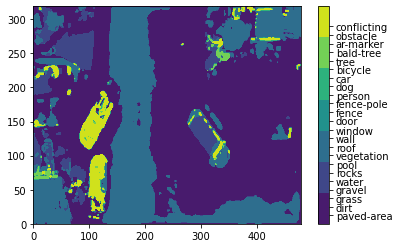

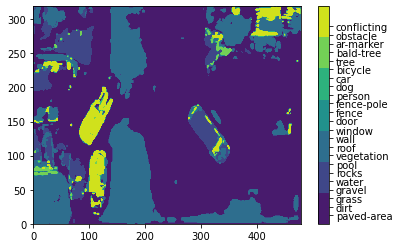

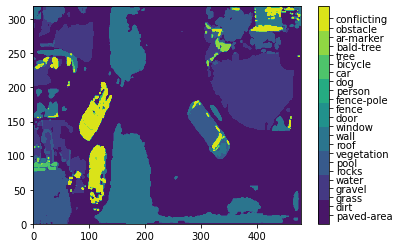

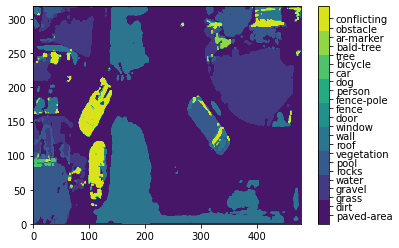

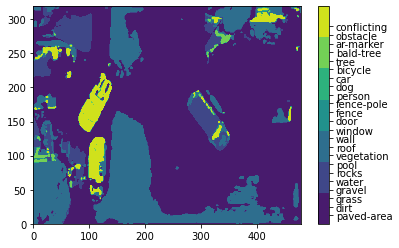

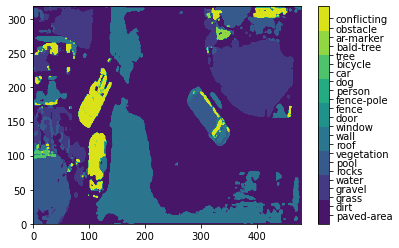

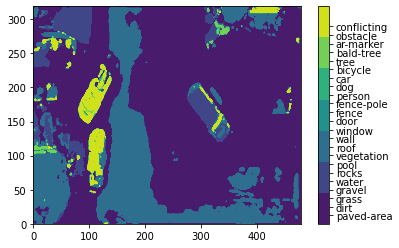

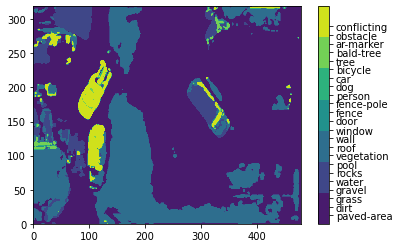

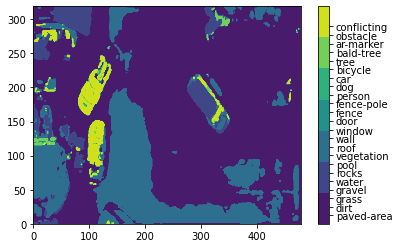

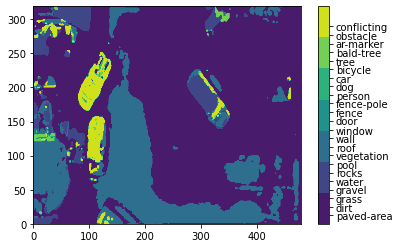

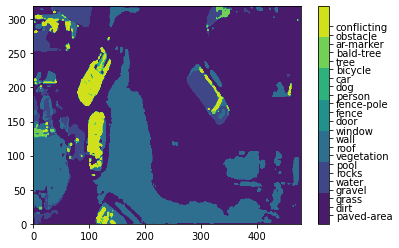

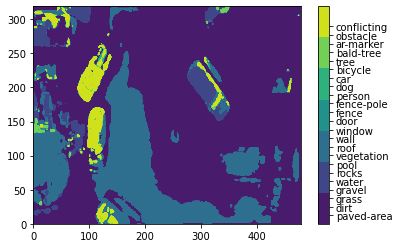

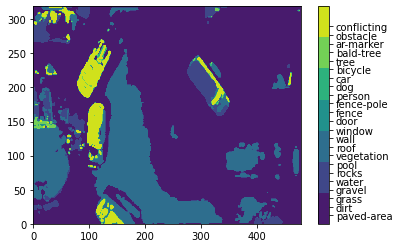

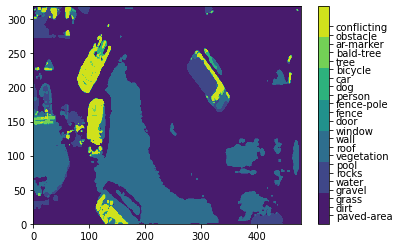

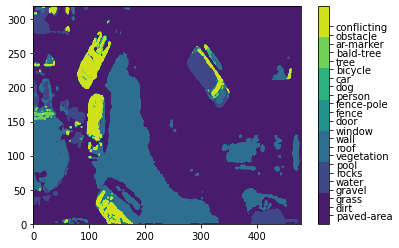

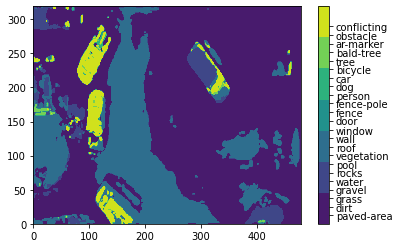

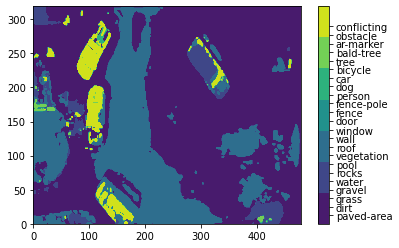

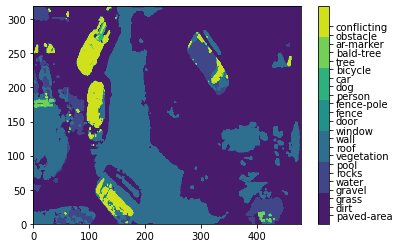

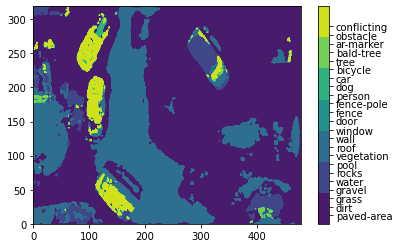

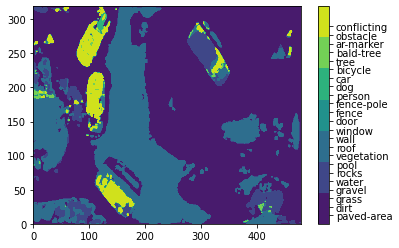

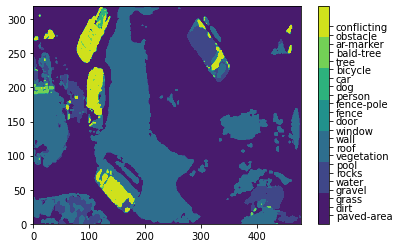

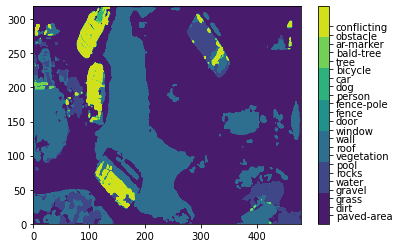

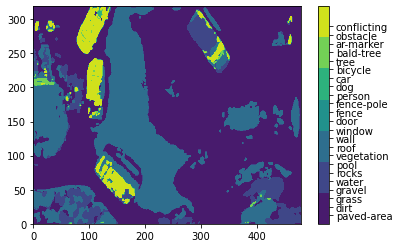

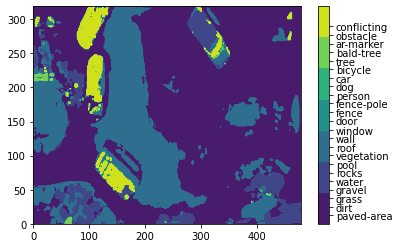

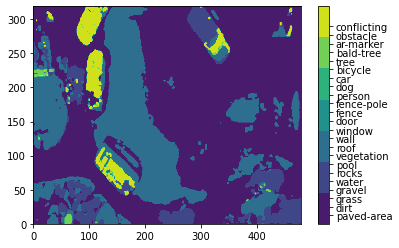

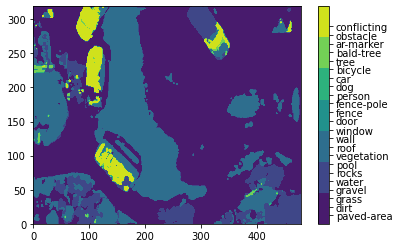

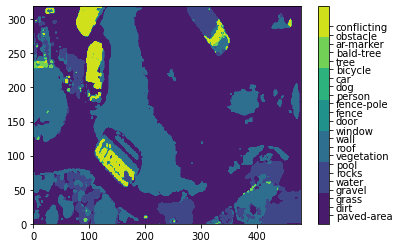

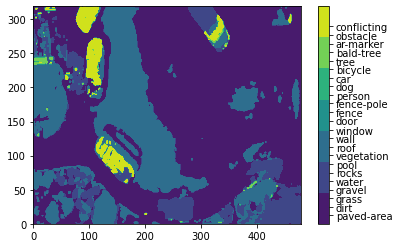

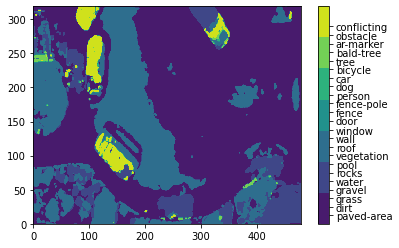

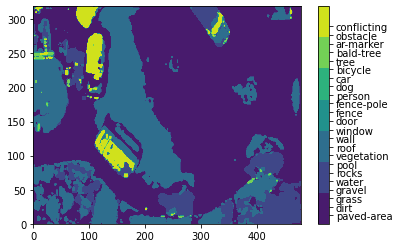

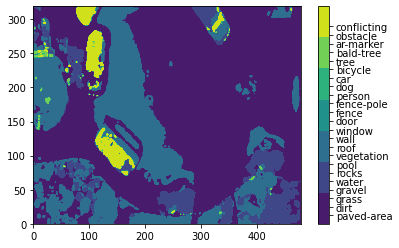

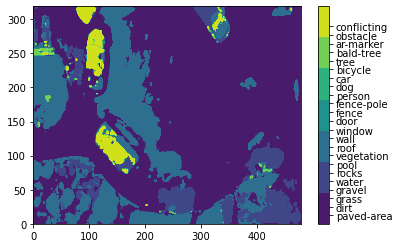

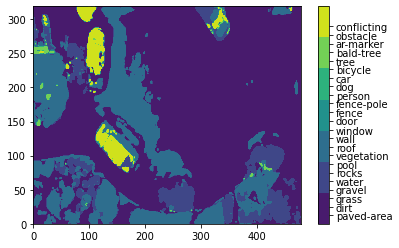

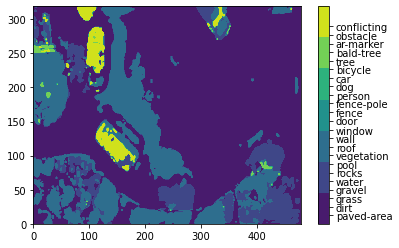

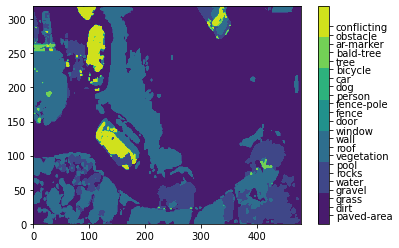

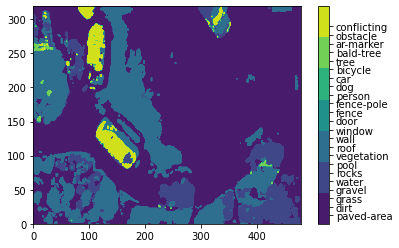

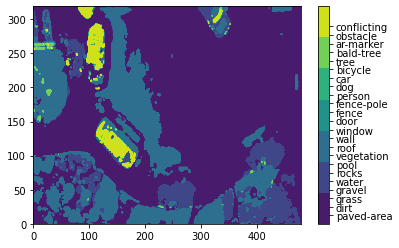

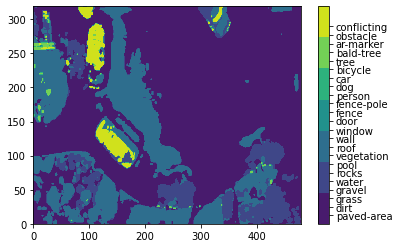

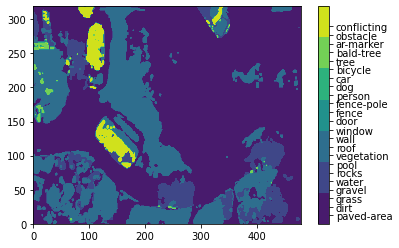

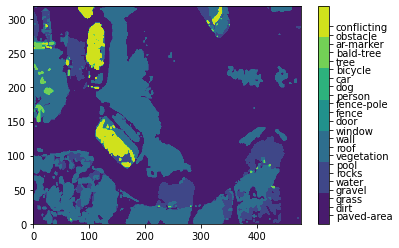

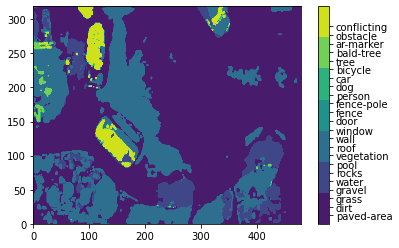

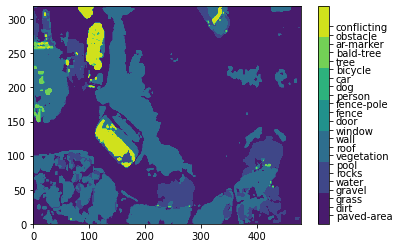

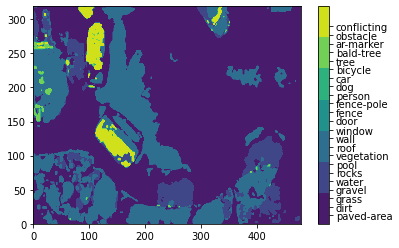

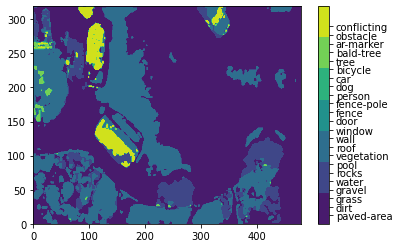

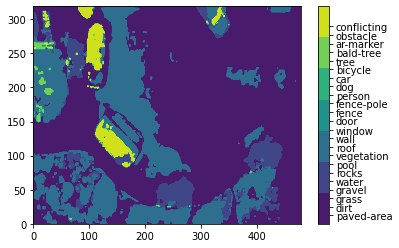

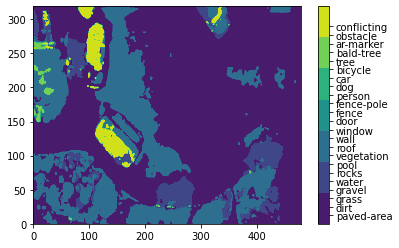

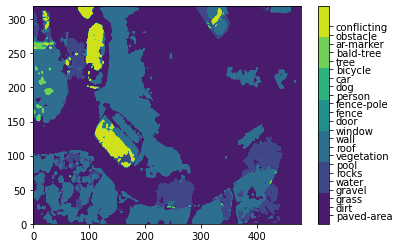

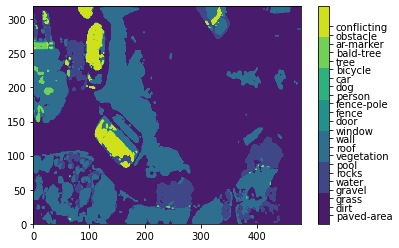

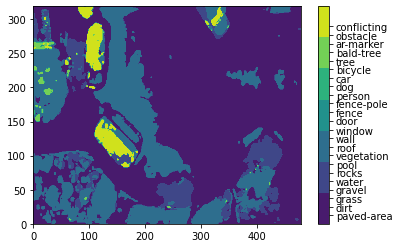

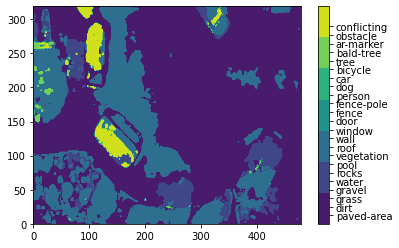

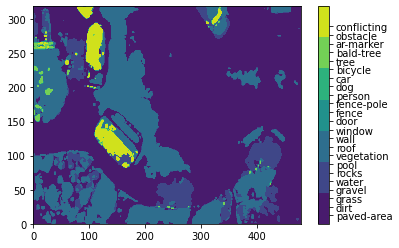

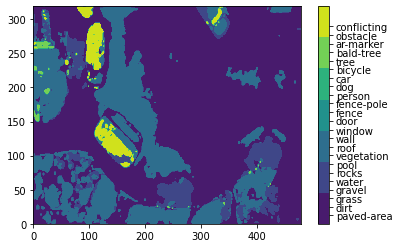

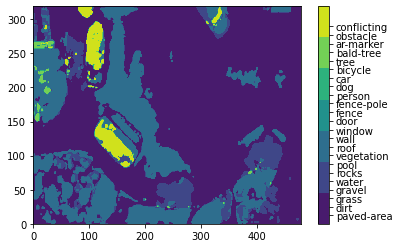

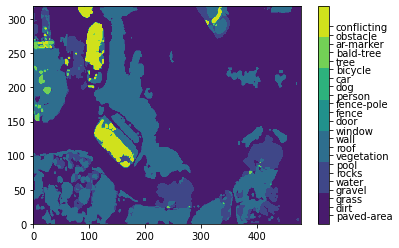

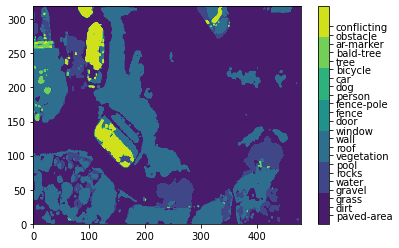

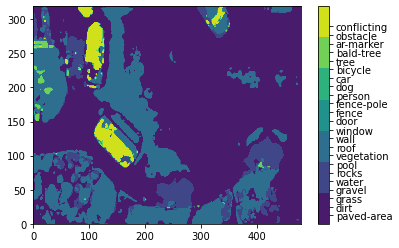

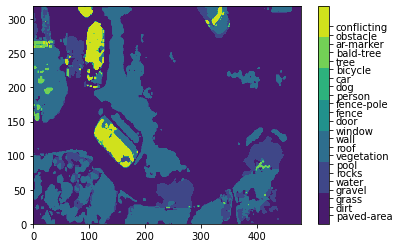

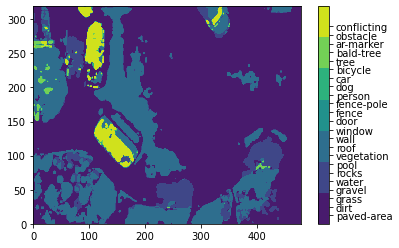

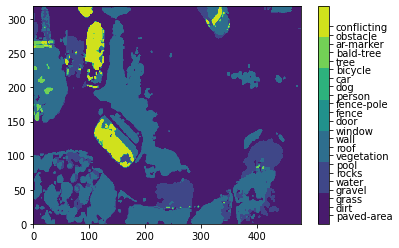

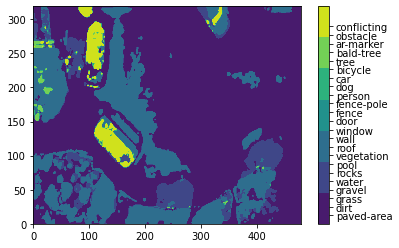

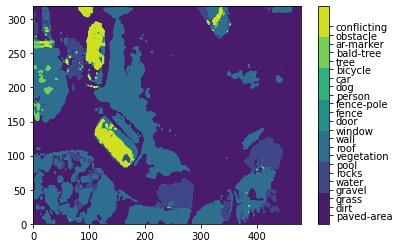

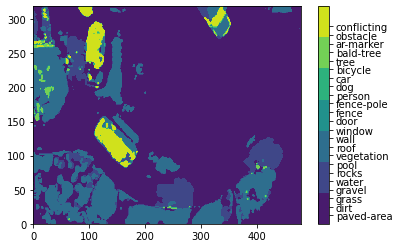

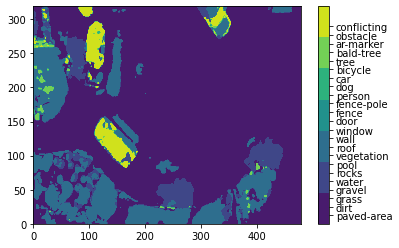

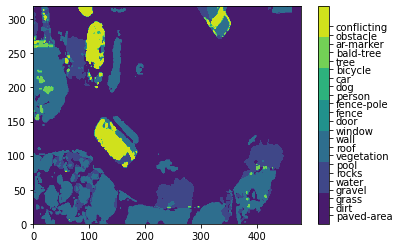

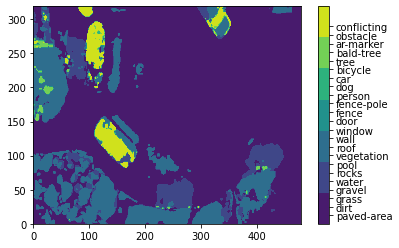

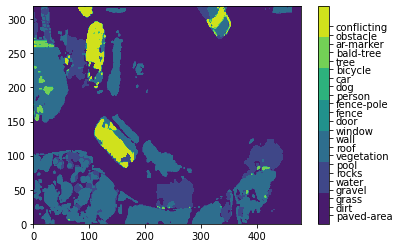

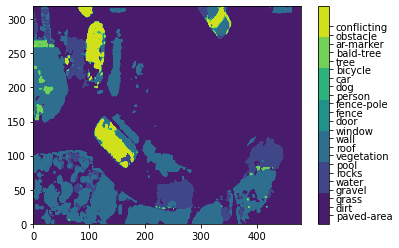

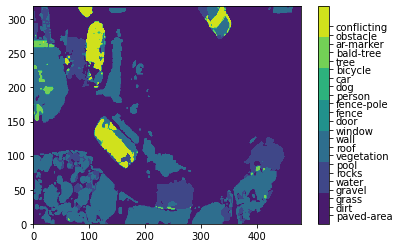

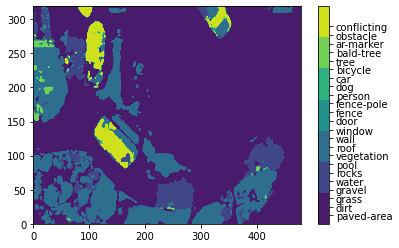

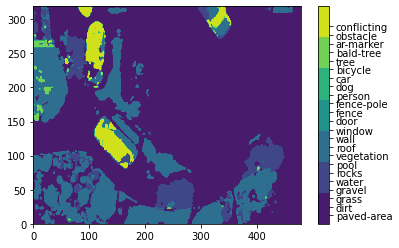

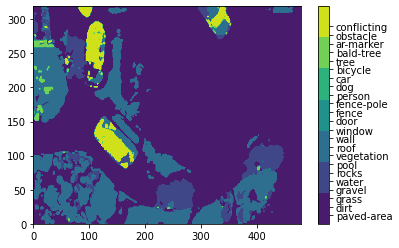

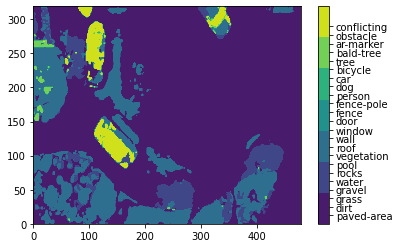

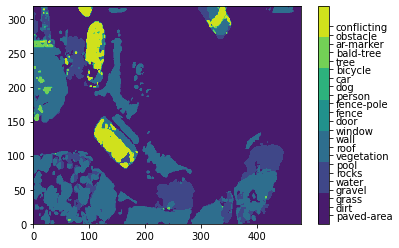

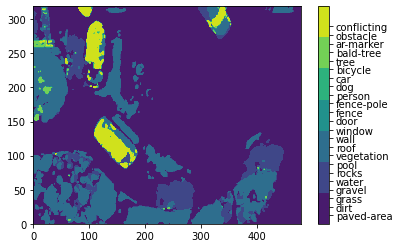

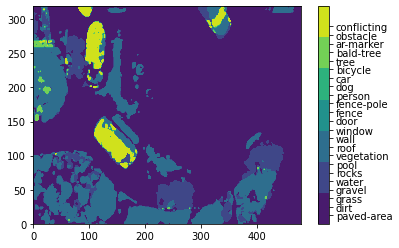

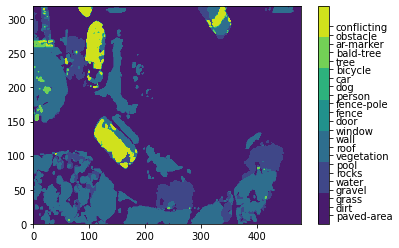

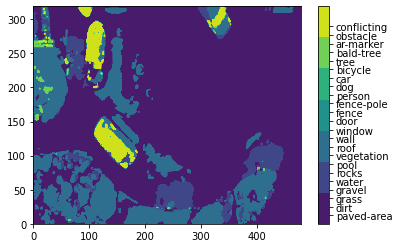

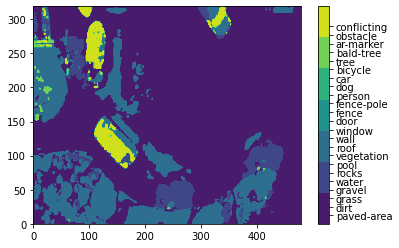

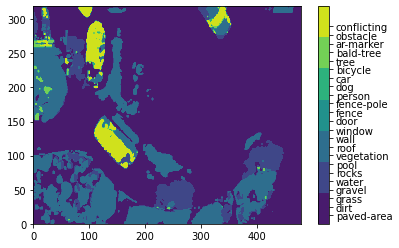

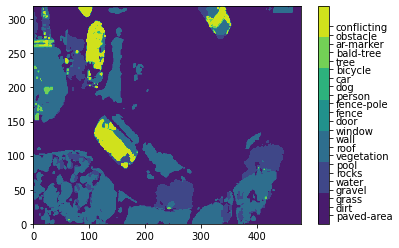

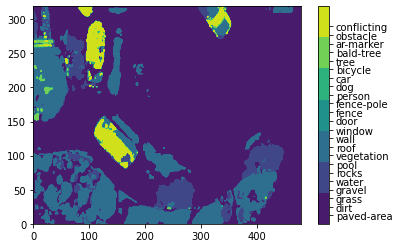

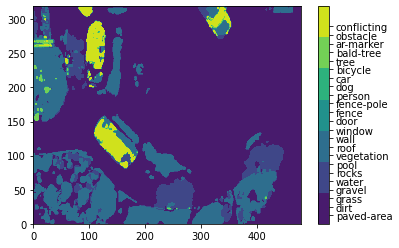

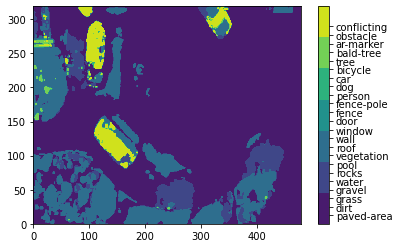

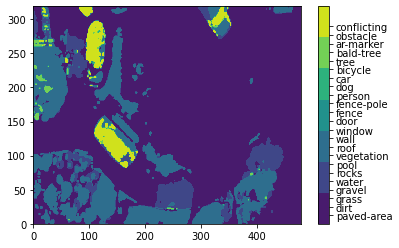

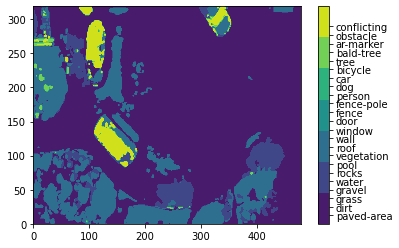

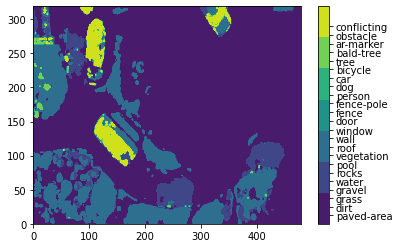

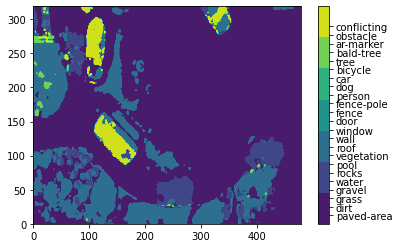

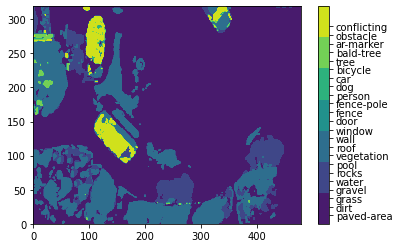

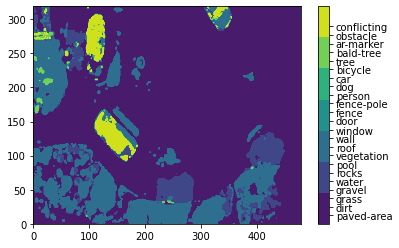

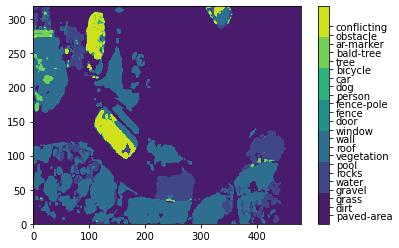

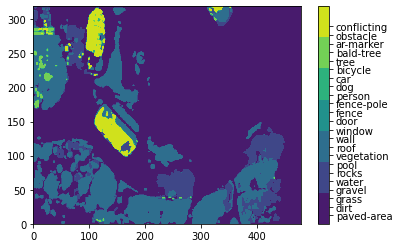

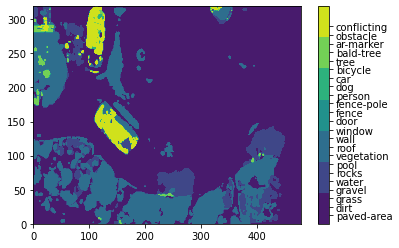

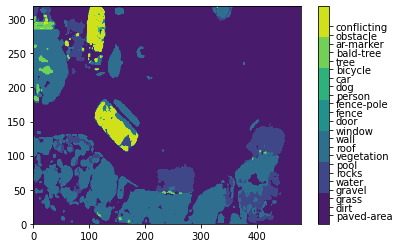

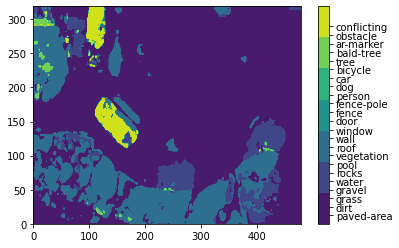

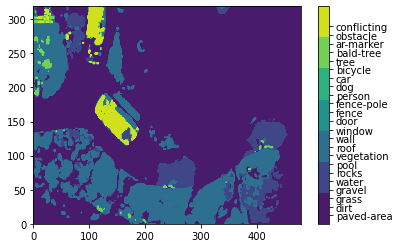

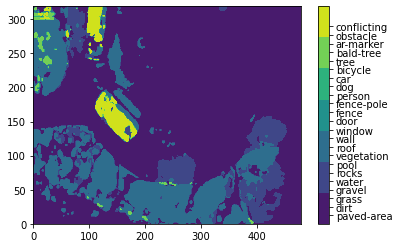

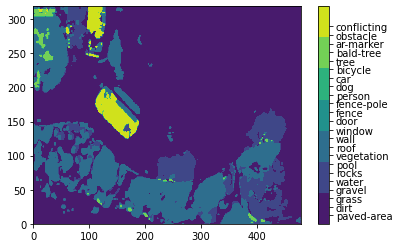

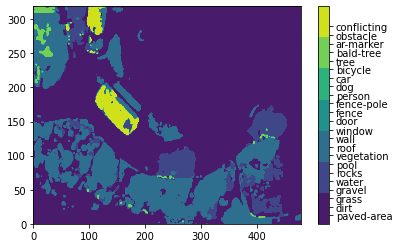

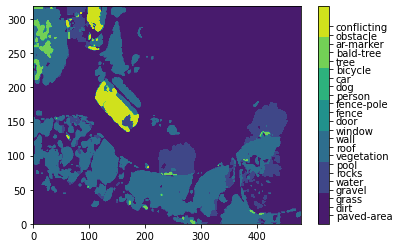

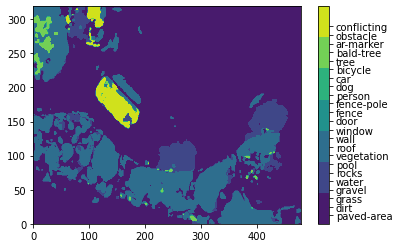

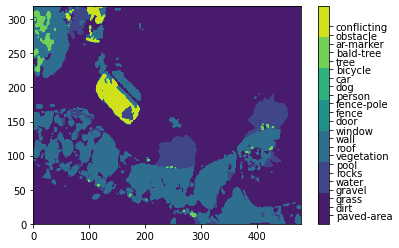

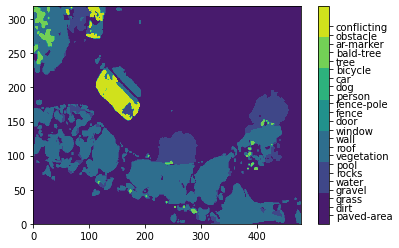

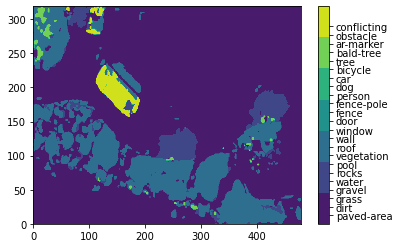

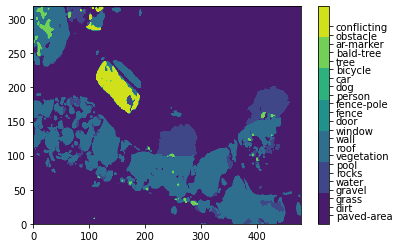

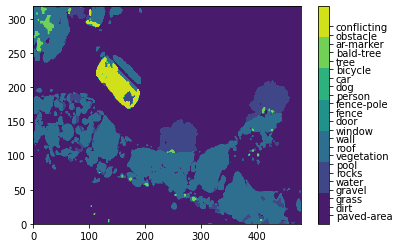

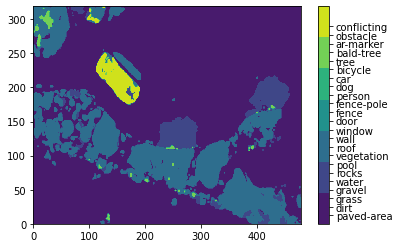

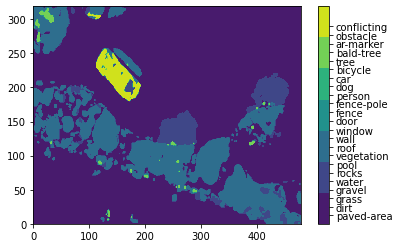

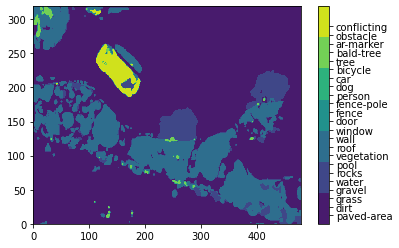

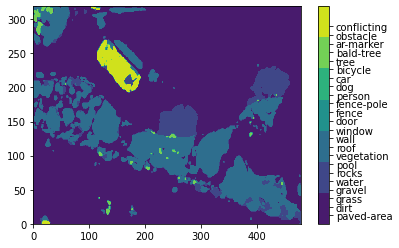

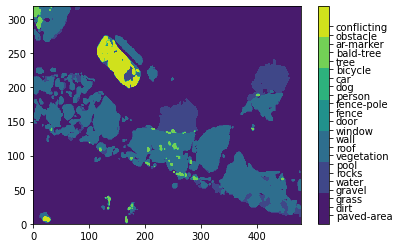

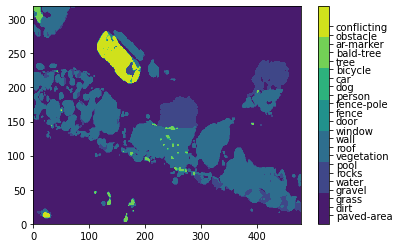

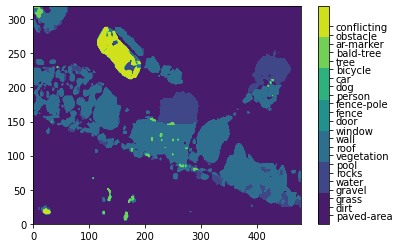

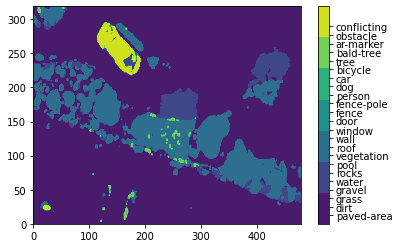

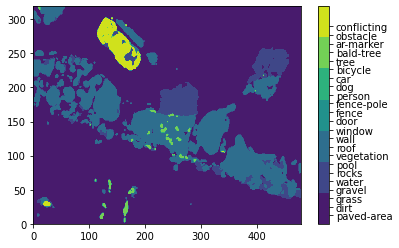

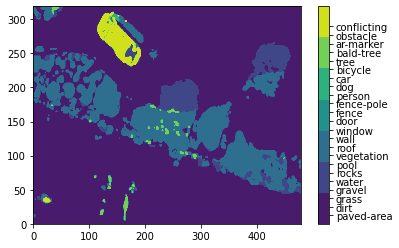

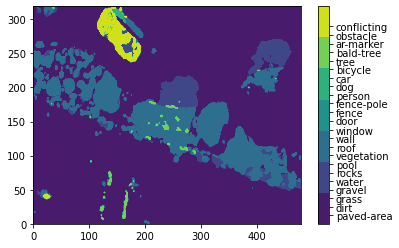

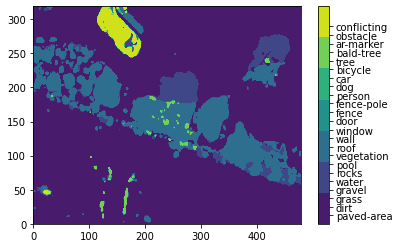

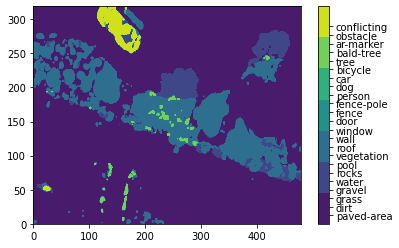

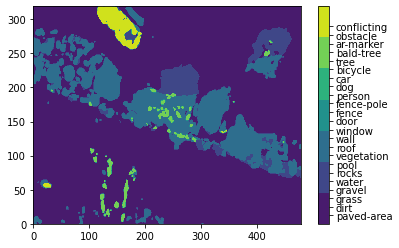

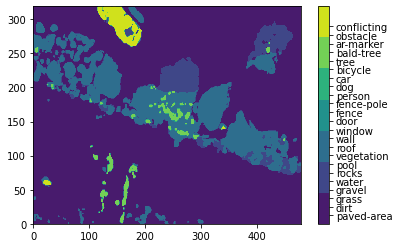

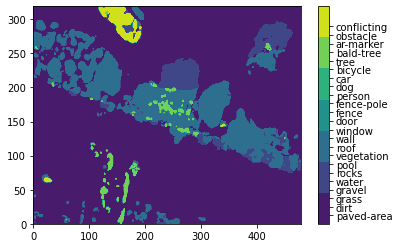

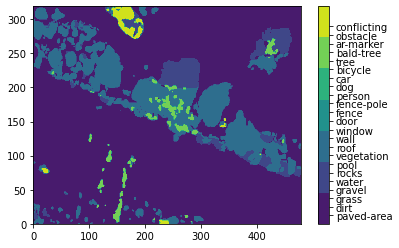

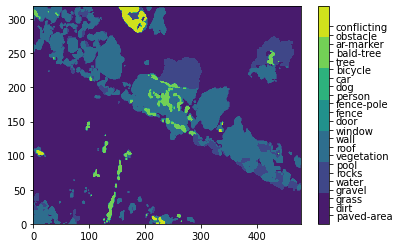

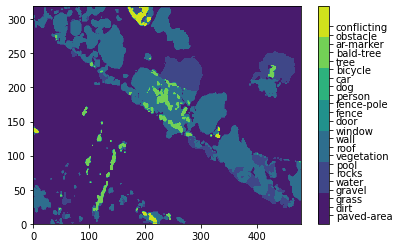

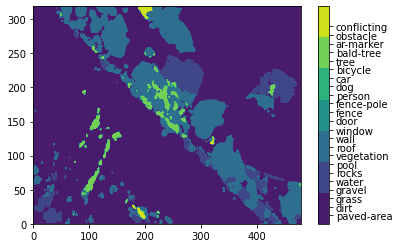

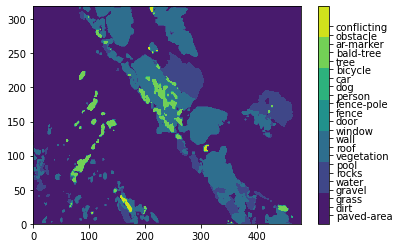

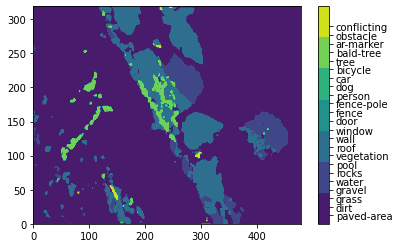

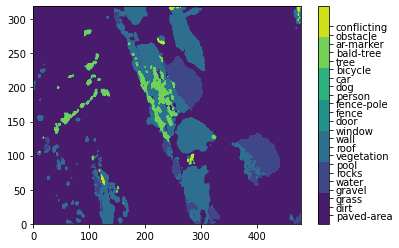

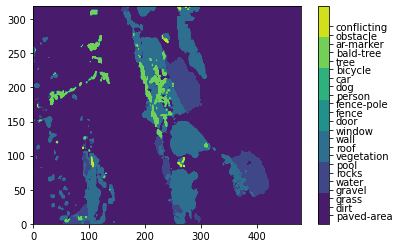

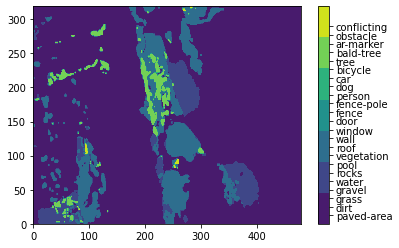

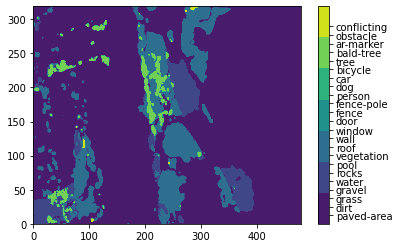

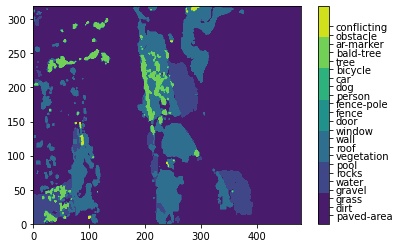

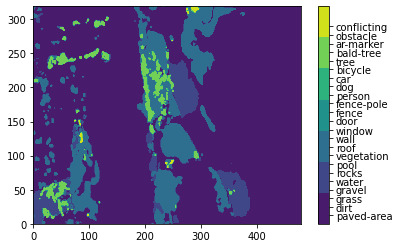

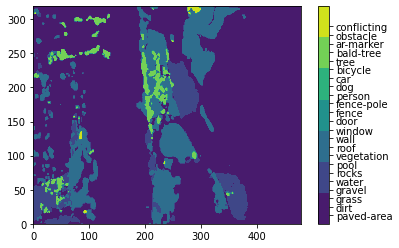

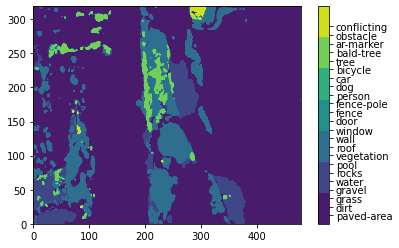

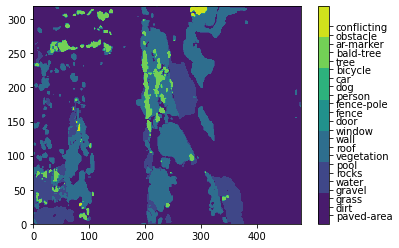

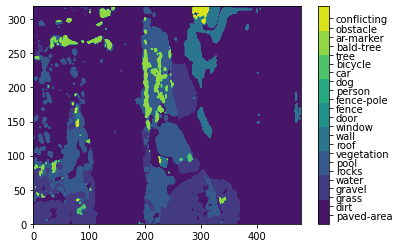

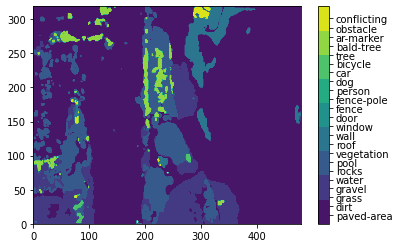

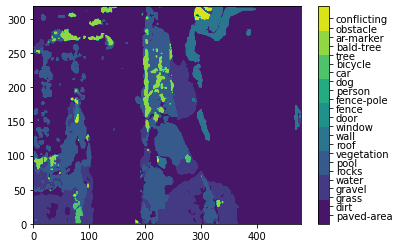

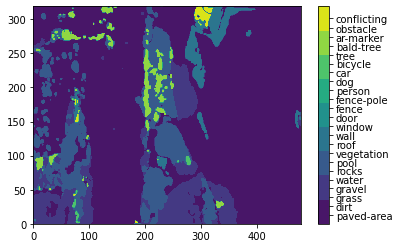

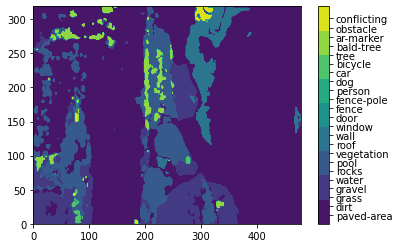

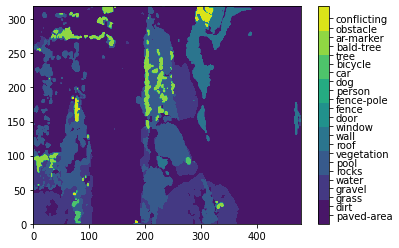

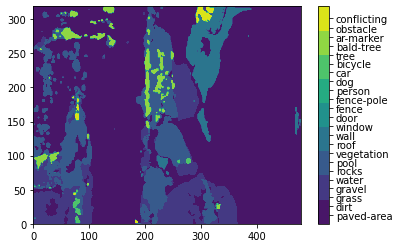

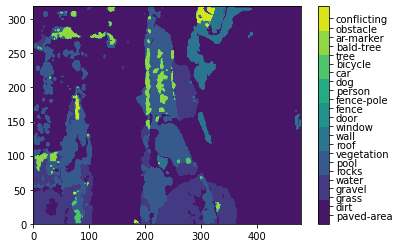

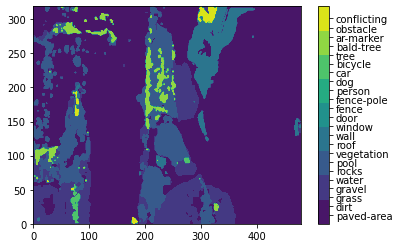

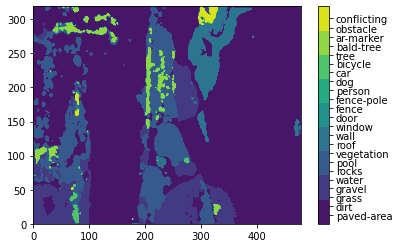

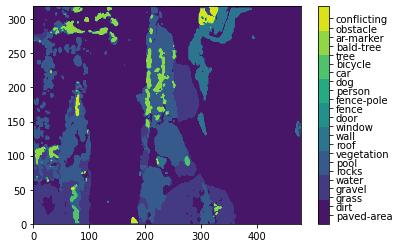

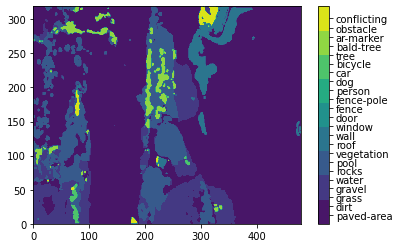

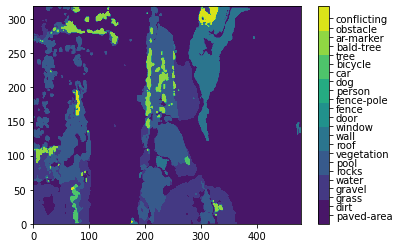

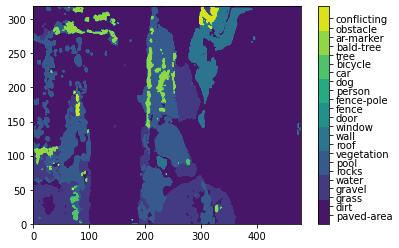

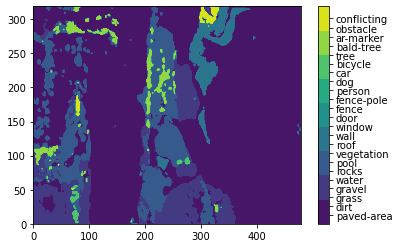

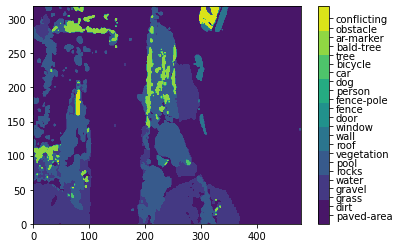

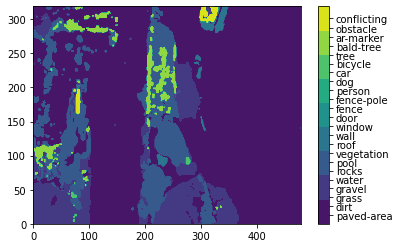

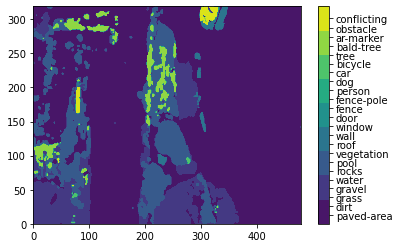

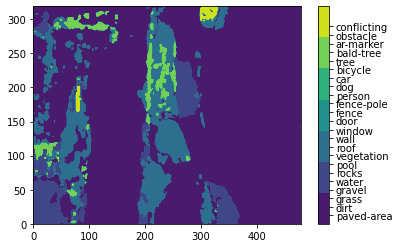

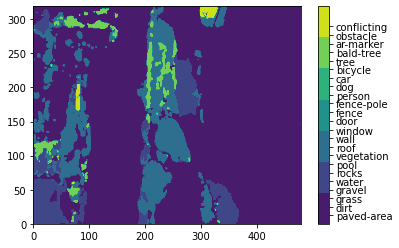

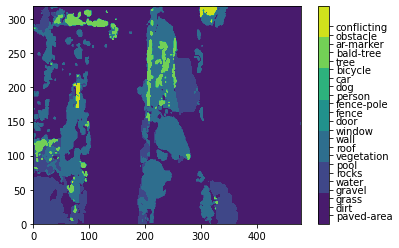

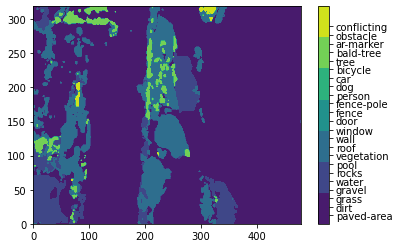

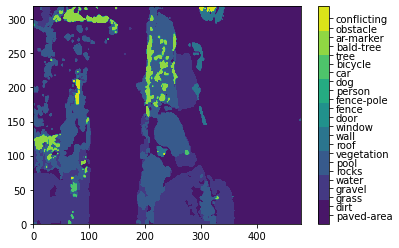

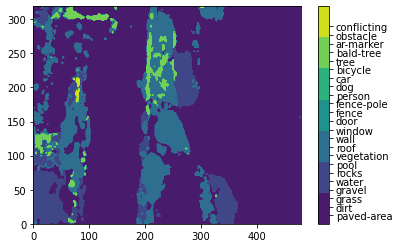

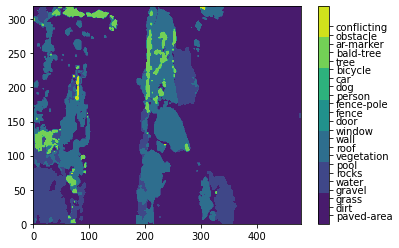

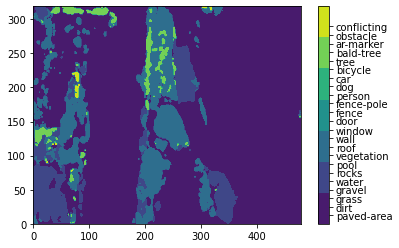

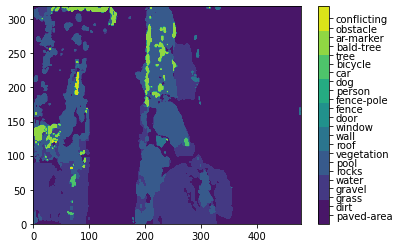

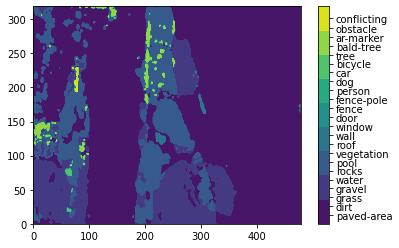

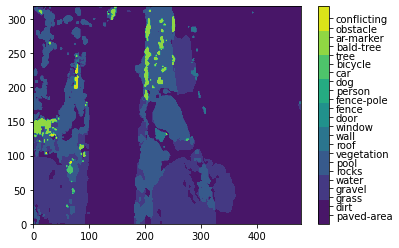

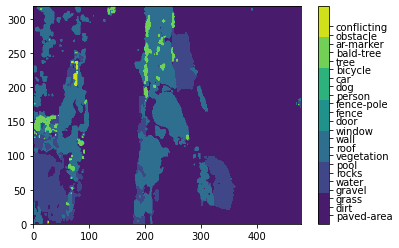

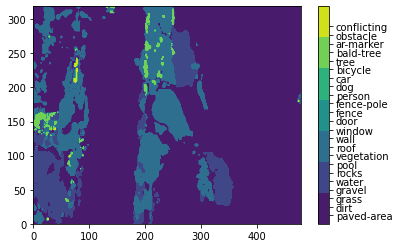

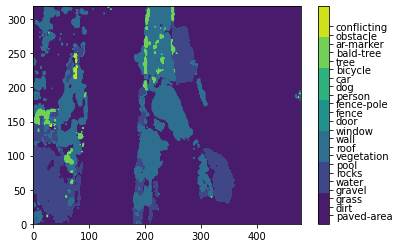

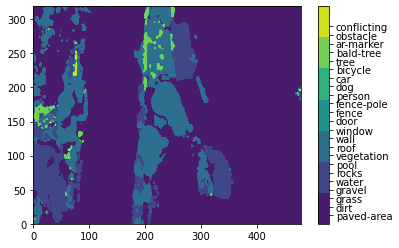

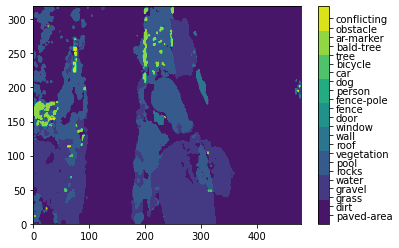

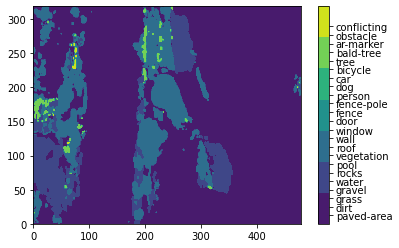

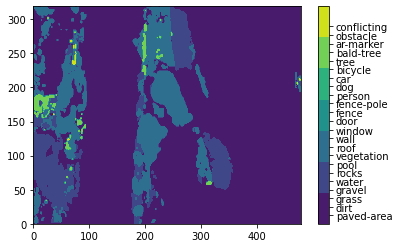

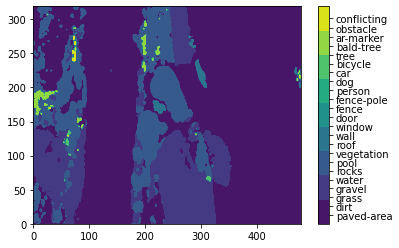

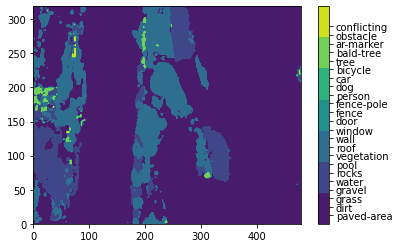

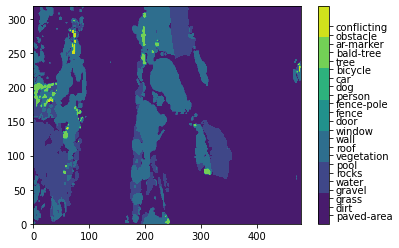

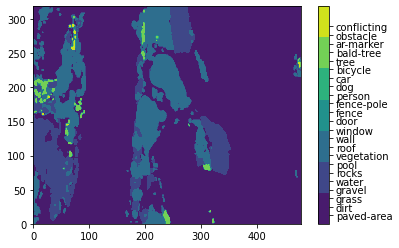

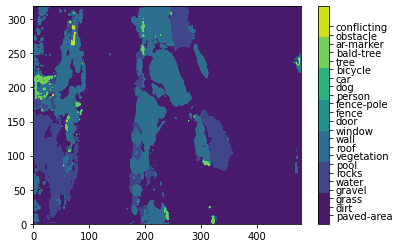

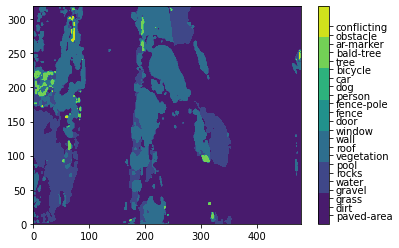

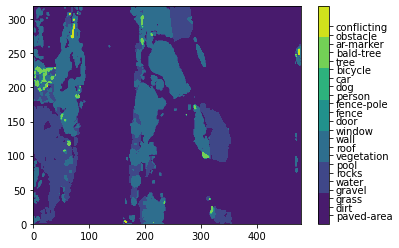

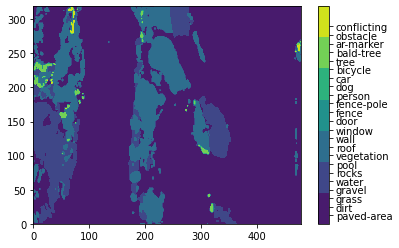

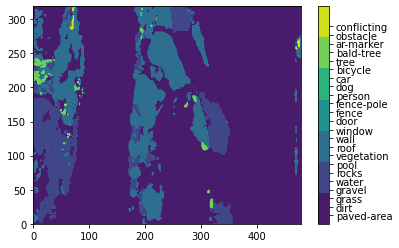

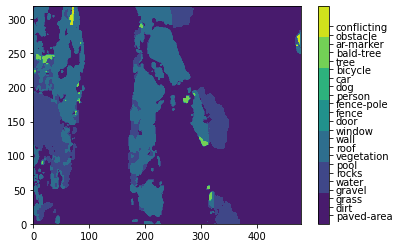

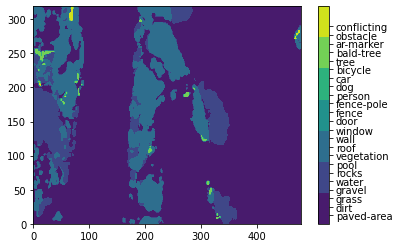

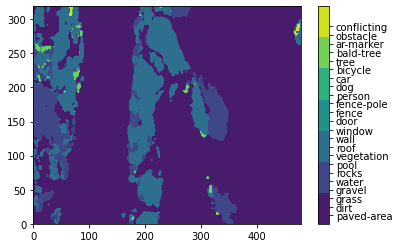

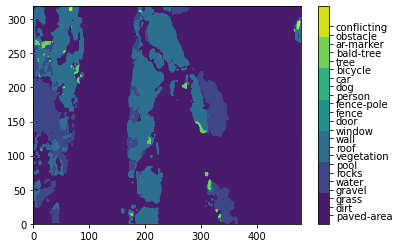

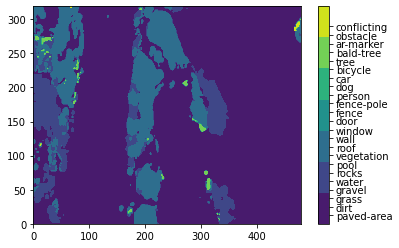

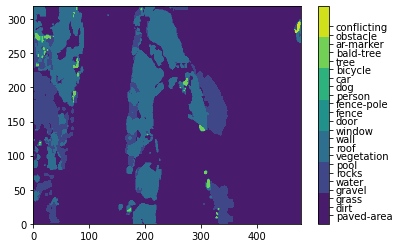

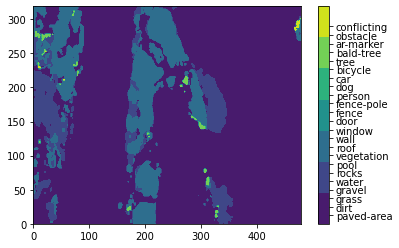

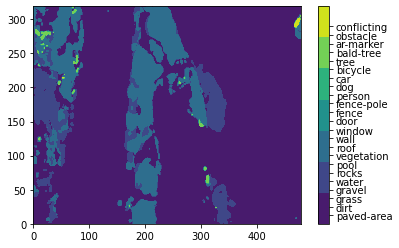

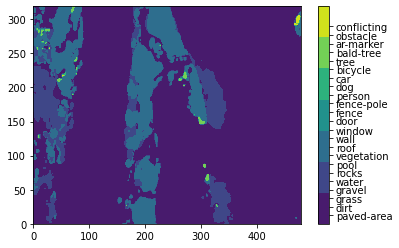

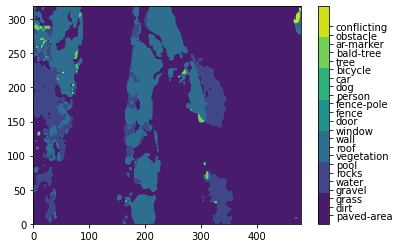

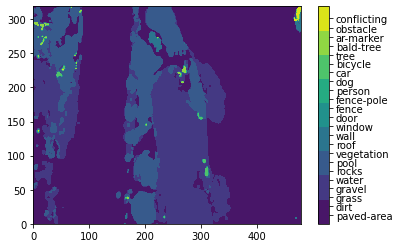

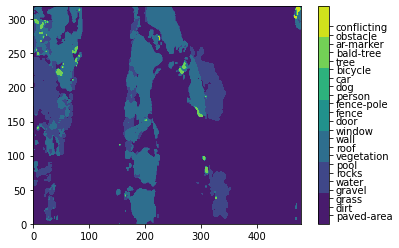

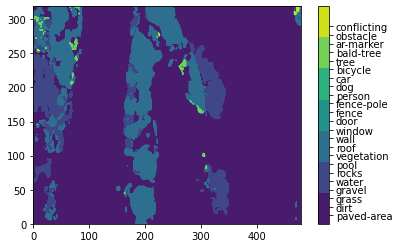

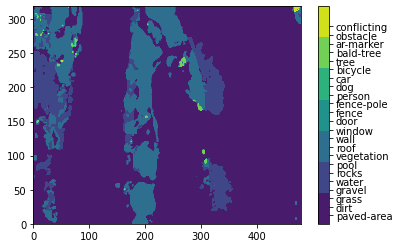

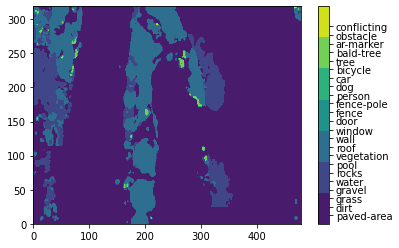

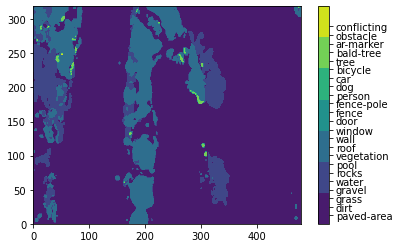

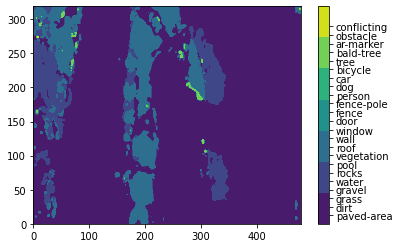

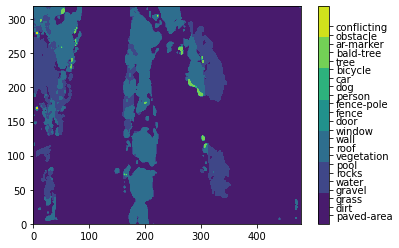

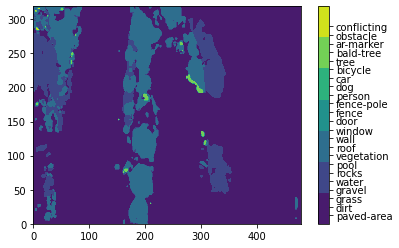

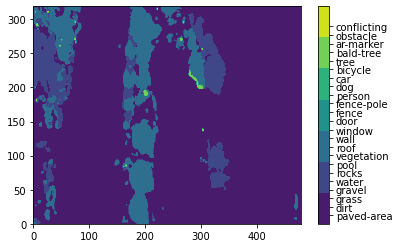

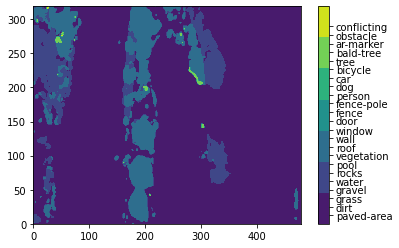

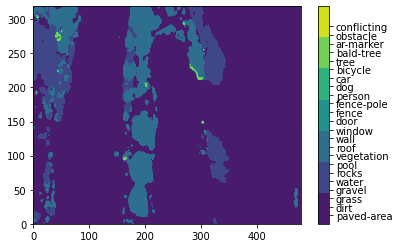

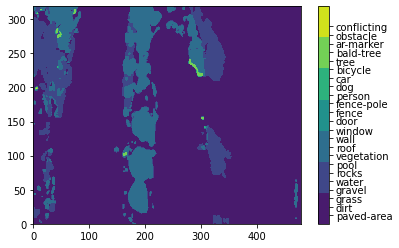

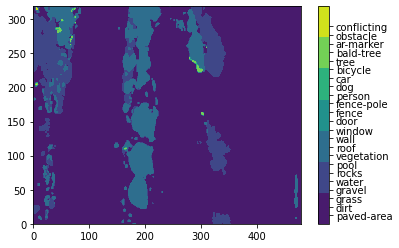

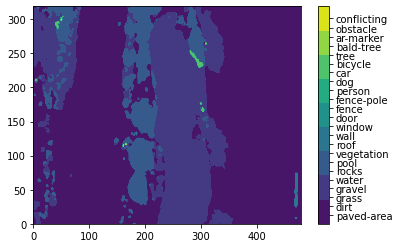

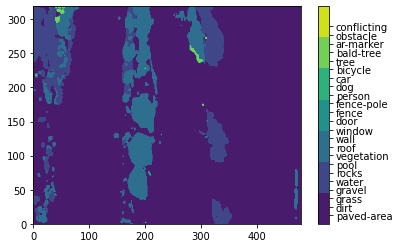

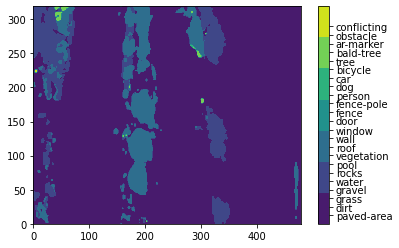

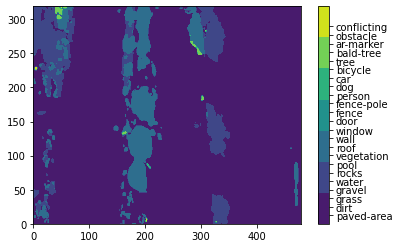

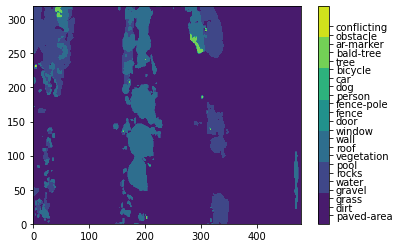

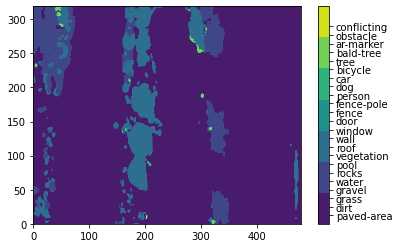

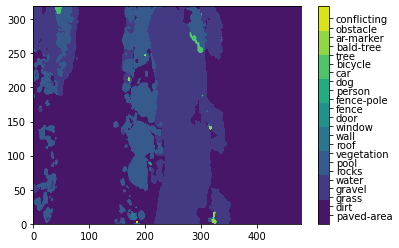

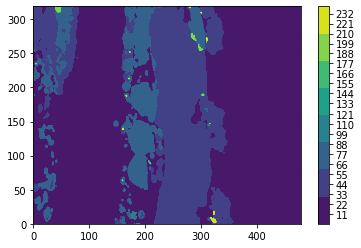

In [85]:
LOCAL: bool = True # I optionally use ": bool" when declaring variables to indicate which type they are
pic_num: int = 400
DEBUG: bool = False
H: int = 320
W: int = 480
min_size: int = 60


if LOCAL:
    pred_path = r"C:\Users\pedri\Desktop\ME 297-01_Deep_Learning\Aruco-classification\img\pred"
    actual_path = r"C:\Users\pedri\Desktop\ME 297-01_Deep_Learning\Aruco-classification\img\orig"
else: 
    pred_path = os.path.relpath(os.getcwd(),r"Segmentation")
    actual_path = os.path.relpath(os.getcwd(), r"Segmentation\data\drone_pics" )

labels = ["paved-area",
        "dirt",
        "grass",
        "gravel",
        "water",
        "rocks",
        "pool",
        "vegetation",
        "roof",
        "wall",
        "window",
        "door",
        "fence",
        "fence-pole",
        "person",
        "dog",
        "car",
        "bicycle",
        "tree",
        "bald-tree",
        "ar-marker",
        "obstacle",
        "conflicting",
]
div = 255 / len(labels)
thresh = [(1 + div*i, (i + 1)*div) if i != 0 else (0, (i + 1)*div) for i in range(len(labels))]
new_list = zip(thresh, labels)
if DEBUG: print(thresh)   

for pic_num in range(get_num_files(pred_path)):
    img = os.path.join(pred_path, f"{pic_num}.png")
    act = os.path.join(actual_path, f"original_{pic_num}.png")

    x = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    y = cv2.imread(act, cv2.IMREAD_COLOR)


    if x is None or y is None:
        print(f"Predicted image Name: {img}, Type: type{type(x)}")
        print(f"Actual image Name: {act}, Type: type{type(y)}")
        raise Exception("No image has been read! Check your path name.")


    y = cv2.resize(y, (W, H))


    thresh_tuple = [cv2.threshold(x, thresh[i][0], thresh[i][1], cv2.THRESH_BINARY) for i in range(len(thresh))]

    mask = [cv2.bitwise_and(x, x, mask = thresh_tuple[i][1]) for i in range(len(thresh_tuple))]
    mask = [cv2.erode(mask[i], None, iterations = 4) for i in range(len(mask))]
    mask = [cv2.dilate(mask[i], None, iterations = 4) for i in range(len(mask))]
    mask = [mask[i].astype(np.uint8) for i in range(len(mask))]
    #mask = [cv2.cvtColor(mask[i], cv2.COLOR_BGR2GRAY) for i in range(len(mask))]
    if DEBUG: print(type(mask[0]))
    if DEBUG: 
            cv2.imshow("Mask", mask[0])
            cv2.waitKey(0)
            cv2.destroyAllWindows()

    for i in range(len(mask)):
        cnts = cv2.findContours(mask[i].copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        center = None
        cX = None
        cY = None

        if DEBUG: print(len(cnts))

        for c in cnts:
            ((cx, cy), radius) = cv2.minEnclosingCircle(c)
            M = cv2.moments(c)
            center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
            (cX, cY) = center
            
            if radius > min_size:
                text = f"{labels[i]}"
                z = cv2.putText(img = y, 
                                text = text, 
                                org = (cX, cY - 15),
                                fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                                fontScale = 0.5, 
                                color = (255, 255, 255), 
                                thickness = 2)
                
                # if LOCAL:
                #     out_dir = r'C:\Users\pedri\Desktop\ME 297-01_Deep_Learning\Aruco-classification\img\labeled_min_size_45'
                #     out_path = os.path.join(out_dir, f"labeled_{pic_num}.png")
                # else:
                #     out_path = f"labeled_{pic_num}.png"  
                # cv2.imwrite(out_path, z)
                

    if DEBUG:
        plt.figure()
        plt.imshow(x)

        plt.figure()
        plt.imshow(y)


    fig = plt.figure()
    plt.contourf(x)
    cbar = plt.colorbar(ticks = [int(thresh[i][1]) for i in range(len(thresh))], orientation = 'vertical')
    cbar.ax.set_yticklabels( [labels[i] for i in range(len(thresh))])#[labels[i] in range(0, len(thresh), 1)])
    
    if LOCAL:
        color_dir = r'C:\Users\pedri\Desktop\ME 297-01_Deep_Learning\Aruco-classification\img\colorbar_min_size_60'
        color_path = os.path.join(color_dir, f"colorbar_{pic_num}.png")
    else:
        color_path = f"colorbar_{pic_num}.png"
    plt.savefig(color_path)


[Text(1, 11.0, 'paved-area'),
 Text(1, 22.0, 'dirt'),
 Text(1, 33.0, 'grass'),
 Text(1, 44.0, 'gravel'),
 Text(1, 55.0, 'water'),
 Text(1, 66.0, 'rocks'),
 Text(1, 77.0, 'pool'),
 Text(1, 88.0, 'vegetation'),
 Text(1, 99.00000000000001, 'roof'),
 Text(1, 110.0, 'wall'),
 Text(1, 121.00000000000001, 'window'),
 Text(1, 133.0, 'door'),
 Text(1, 144.0, 'fence'),
 Text(1, 155.0, 'fence-pole'),
 Text(1, 166.0, 'person'),
 Text(1, 177.0, 'dog'),
 Text(1, 187.99999999999997, 'car'),
 Text(1, 198.99999999999997, 'bicycle'),
 Text(1, 209.99999999999997, 'tree'),
 Text(1, 221.0, 'bald-tree'),
 Text(1, 232.00000000000003, 'ar-marker'),
 Text(1, 243.00000000000003, 'obstacle'),
 Text(1, 255.0, 'conflicting')]

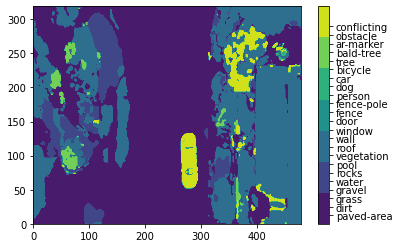

In [61]:
n = 1

fig = plt.figure()
plt.contourf(x)
cbar = plt.colorbar (ticks = [int(thresh[i][1]) for i in range(0, len(thresh), n)], orientation = 'vertical')
cbar.ax.set_yticklabels( [labels[i] for i in range(0, len(thresh), n)])#[labels[i] in range(0, len(thresh), 1)])



# Make Predictions on our own dataset

In [15]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, Callback
from tensorflow.keras.utils import plot_model
import os


# Show GPUs devices
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4362814742952989332
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2956368283
locality {
  bus_id: 1
  links {
  }
}
incarnation: 940421028539062863
physical_device_desc: "device: 0, name: Quadro M1200, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [16]:
image_path = "../data/"
img = os.path.join(image_path, "drone_pic.PNG")
H = 320
W = 480
x = cv2.imread(img, cv2.IMREAD_COLOR)
x = cv2.resize(x, (W, H))
x = x/255.0
x = x.astype(np.float32)
plt.figure()
plt.imshow(x)
plt.colorbar(label="Labels")

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [15]:
# Load Model
model = tf.keras.models.load_model("../results/models/model_3.h5")

In [29]:
p = model.predict(np.expand_dims(x, axis=0))[0]


In [ ]:
p = np.argmax(p, axis=-1)
p = np.expand_dims(p, axis=-1)  
num_classes = 23
p = p * (255/num_classes)
p = p.astype(np.int32)
p = np.concatenate([p, p, p], axis=2)

In [24]:
cv2.imwrite(f"../results/real_pred.jpg", p)

True

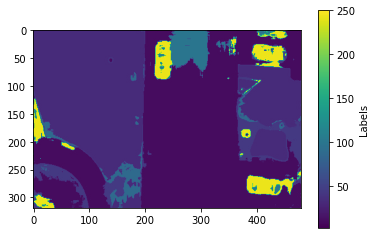

In [25]:
pred = cv2.imread("../results/real_pred.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(pred)
plt.colorbar(label="Labels")

In [28]:
p.shape

(320, 480, 3)

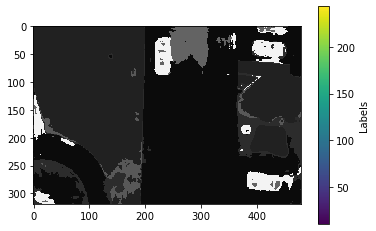

In [23]:
plt.imshow(p, interpolation = 'nearest')
plt.colorbar(label="Labels")